In [4]:
import pandas as pd
import seaborn as sns

In [2]:
source = "https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv"
df = pd.read_csv(source)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [73]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Q0. Which of the features are categorical, which are numerical?

*Categorical:* PassengerId, Survived, Pclass, Name, Sex, Ticket Number, Cabin, Embarked <br>
*Numerical:* Age, SibSp, Parch, Fare

Hint: Catagorical data refers to data with fixed or finite groupings. Numerical data is data that can be measured and used in mathematical operations

Q1. Given the dataset description, what are some 3 questions you want to investigate with this data?

Q2. Show with 2 boxplots, the difference in the distribution of ages amongst male and female passengers. What are your observations?

[Text(0.5, 1.0, 'Frequency of Male & Females aboard the Titanic')]

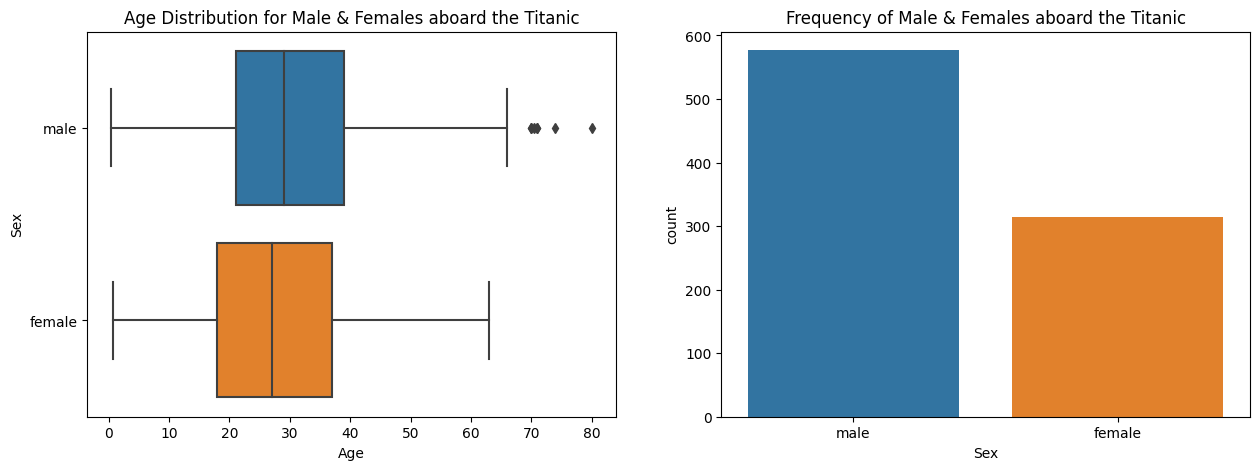

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(
    df,
    x="Age",
    y="Sex",
    ax=ax1
).set(title="Age Distribution for Male & Females aboard the Titanic")

sns.countplot(
    df,
    x="Sex",
    ax=ax2
).set(title="Frequency of Male & Females aboard the Titanic")

Q3. Show with 2 separate histogram plots, the age distributions for all passengers who (1) survived (2) died

[Text(0.5, 1.0, 'Age Dist. for Dead Passengers')]

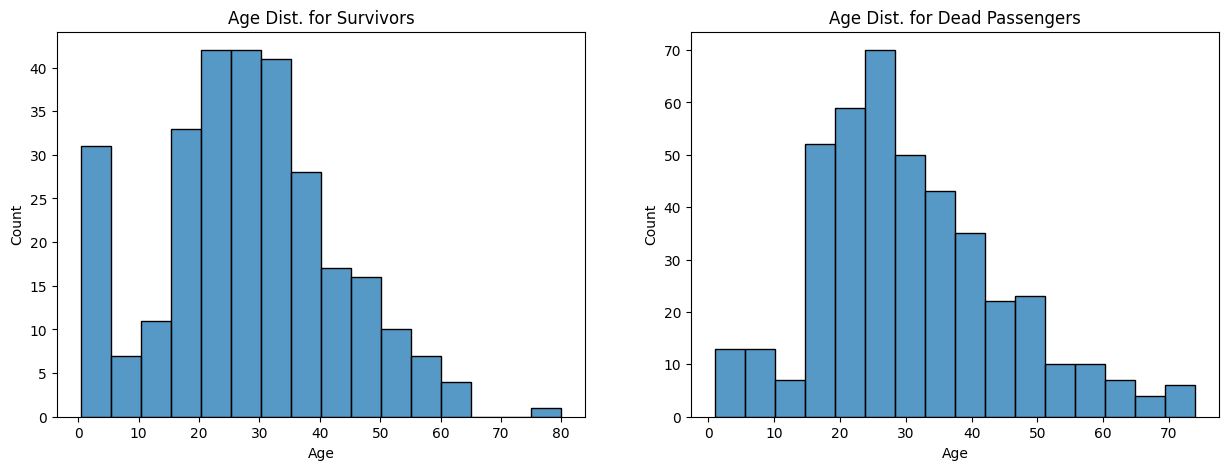

In [46]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(
    df[df.Survived == 1],
    x="Age",
    ax=ax1
).set(title="Age Dist. for Survivors")

sns.histplot(
    df[df.Survived == 0],
    x="Age",
    ax=ax2
).set(title="Age Dist. for Dead Passengers")

Q4. Show with a (plot of your choice) the different ports each passenger embarked at?

[Text(0.5, 1.0, 'Nr. of Passengers at each Embarkation Point')]

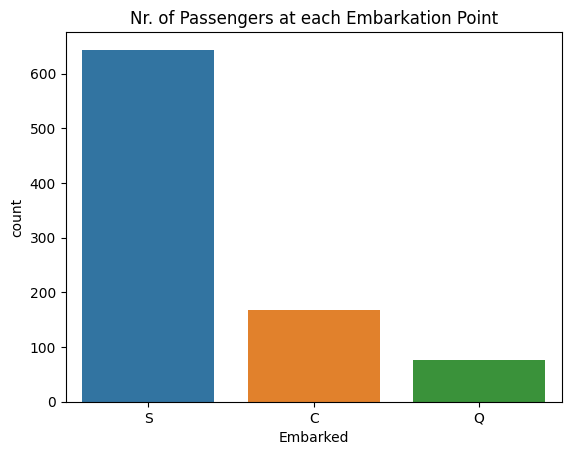

In [49]:
sns.countplot(
    df,
    x="Embarked"
).set(title="Nr. of Passengers at each Embarkation Point")

Q5. Show with plots of your choice, the socio-economic status (SES) distributions for passengers who embarked on the ship and passengers who survived

[Text(0.5, 1.0, 'SES for Survivors')]

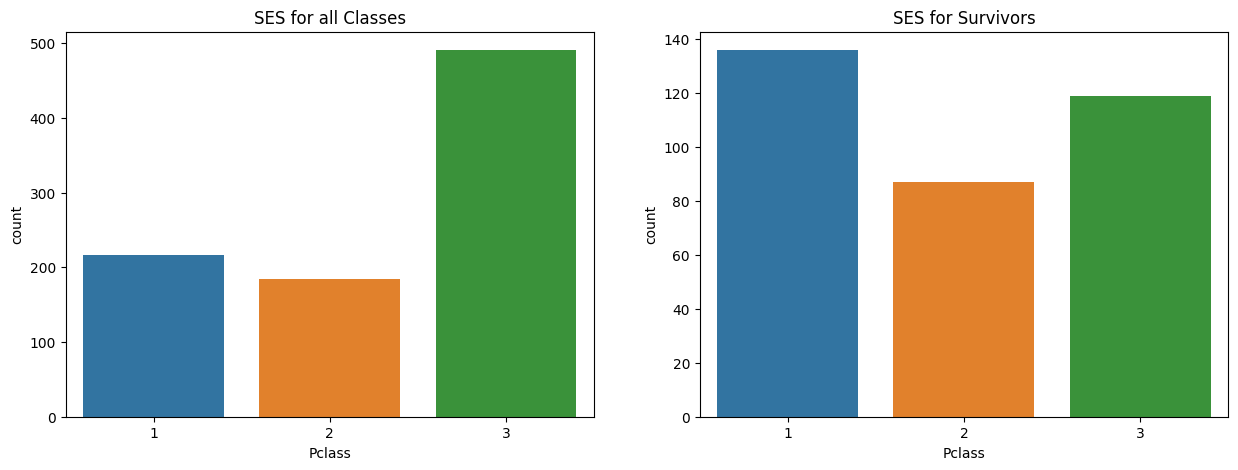

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(
    df,
    x="Pclass",
    ax=ax1
).set(title="SES for all Classes")

sns.countplot(
    df[df.Survived == 1],
    x="Pclass",
    ax=ax2
).set(title="SES for Survivors")

#### Preprocessing

Q6. Which columns should be dropped from the final data representation for modeling?

In [52]:
cols_to_drop = ["Name", "Ticket", "Cabin"]
df_model =  df.drop(columns=cols_to_drop)

Label Encoding: Converting categorical features to numerical for training

In [88]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels into numerical 
sex_le = LabelEncoder().fit(df.Sex)
df_model["Sex"] = sex_le.transform(df.Sex)

embarked_le = LabelEncoder().fit(df.Embarked)
df_model["Embarked"] = embarked_le.transform(df.Embarked)

df_model.head()

In [89]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
print(len(df_model))
df_model = df_model.dropna()
print(len(df_model))

891
714


In [57]:
from sklearn.model_selection import train_test_split

# ~ tilde

X, y = df_model.loc[:, ~(df_model.columns.isin(["Survived"]))], df_model.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
149,150,2,1,42.0,0,0,13.0000,2
407,408,2,1,3.0,1,1,18.7500,2
53,54,2,0,29.0,1,0,26.0000,2
369,370,1,0,24.0,0,0,69.3000,0
818,819,3,1,43.0,0,0,6.4500,2
...,...,...,...,...,...,...,...,...
691,692,3,0,4.0,0,1,13.4167,0
220,221,3,1,16.0,0,0,8.0500,2
866,867,2,0,27.0,1,0,13.8583,0
587,588,1,1,60.0,1,1,79.2000,0


#### Model fitting

In [58]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

In [91]:
# Inference
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [81]:
from sklearn import tree

# plt.figure(figsize=(30,10), facecolor ='k')
# tree.plot_tree(clf)

#### Evaluation

In [78]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7288135593220338